In [1]:
import numpy as np
import matplotlib as mlb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion = keras.datasets.fashion_mnist

In [4]:
(train_x, train_y), (test_x, test_y) = fashion.load_data()

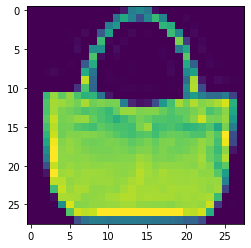

In [5]:
plt.imshow(train_x[100])

In [6]:
class_names = ['Tshirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
train_x = train_x.reshape(60000,28,28,1)
test_x = test_x.reshape(10000,28,28,1)

In [8]:
train_x = train_x/255.
test_x = test_x/255.

In [9]:
valid_x, train_x = train_x[:5000], train_x[5000:]
valid_y, train_y = train_y[:5000], train_y[5000:]

In [10]:
np.random.seed(42)

In [11]:
tf.random.set_seed(42)

In [28]:
model = keras.models.Sequential()

In [29]:
model.add(keras.layers.Conv2D(filters=32,strides=1,padding='valid',kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))

In [30]:
model.add(keras.layers.MaxPooling2D(2,2))

In [31]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
               metrics=["accuracy"])

In [35]:
model_history = model.fit(train_x, train_y, epochs=12, batch_size=64, validation_data=(valid_x, valid_y))

Train on 55000 samples, validate on 5000 samples
Epoch 1/12
55000/55000 [==============================] - 37s 670us/sample - loss: 0.8509 - accuracy: 0.7055 - val_loss: 0.5741 - val_accuracy: 0.7944
Epoch 2/12
55000/55000 [==============================] - 37s 668us/sample - loss: 0.5312 - accuracy: 0.8077 - val_loss: 0.4880 - val_accuracy: 0.8226
Epoch 3/12
55000/55000 [==============================] - 36s 660us/sample - loss: 0.4711 - accuracy: 0.8305 - val_loss: 0.4807 - val_accuracy: 0.8250
Epoch 4/12
55000/55000 [==============================] - 35s 642us/sample - loss: 0.4349 - accuracy: 0.8454 - val_loss: 0.4060 - val_accuracy: 0.8594
Epoch 5/12
55000/55000 [==============================] - 35s 640us/sample - loss: 0.4087 - accuracy: 0.8547 - val_loss: 0.4692 - val_accuracy: 0.8234
Epoch 6/12
55000/55000 [==============================] - 35s 643us/sample - loss: 0.3884 - accuracy: 0.8613 - val_loss: 0.3957 - val_accuracy: 0.8636
Epoch 7/12
55000/55000 [=====================

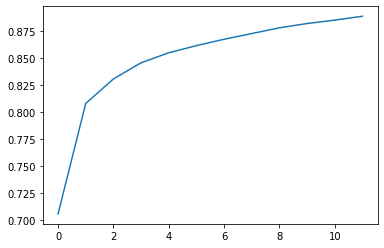

In [62]:
plt.plot(np.arange(0,12,1), model_history.history['accuracy'])

In [63]:
ev = model.evaluate(test_x, test_y)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [67]:
print("loss:" , ev[0])
print("Accuracy:" , ev[1])

loss: 0.35924971101284026
Accuracy: 0.8717


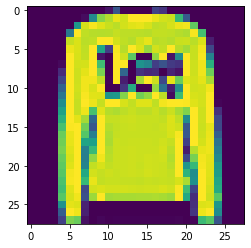

In [74]:
plt.imshow(test_x[1].reshape(28,28))

In [77]:
y_pred = model.predict(test_x)

In [87]:
print(y_pred[1].round())
print("highest probability of index=2")

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
highest probability of index=2


In [85]:
print("index:", test_y[1])

index: 2
